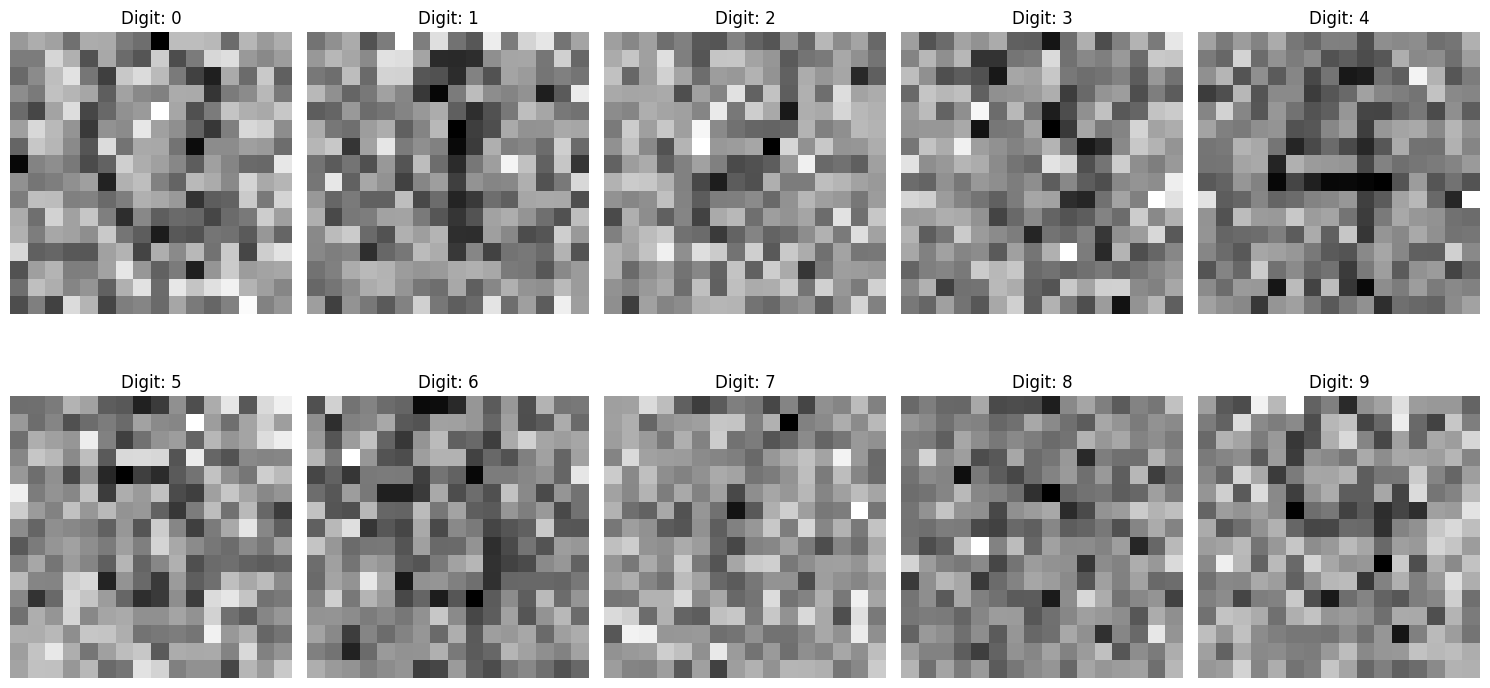

Number of extracted composite images: 10
Extracted digits: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Specify the path to your test_digits folder and the zip file
test_digits_folder = 'test_digits'
zip_filename = 'experiment_results_participant65.zip'
zip_filepath = os.path.join(test_digits_folder, zip_filename)

# Create a dictionary to store the extracted images
extracted_images = {}

# Open the zip file
with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    # List all files in the zip
    file_list = zip_ref.namelist()
    
    # Filter for composite images
    composite_images = [f for f in file_list if f.endswith('_composite_participant65.png')]
    
    # Extract and store the composite images
    for image_name in composite_images:
        with zip_ref.open(image_name) as file:
            img = Image.open(file)
            img_array = np.array(img)
            
            # Extract digit (ground truth) from filename
            digit = int(image_name.split('_')[0])
            
            extracted_images[digit] = img_array

# Display the extracted images
plt.figure(figsize=(15, 8))
for i, (digit, img_array) in enumerate(sorted(extracted_images.items())):
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of extracted composite images: {len(extracted_images)}")
print("Extracted digits:", sorted(extracted_images.keys()))

# You can now use the extracted_images dictionary for further analysis
# For example, to access the image array for digit 5:
# digit_5_array = extracted_images[5]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import zipfile
import os

# Load the pre-trained model
# Ensure the module is in the correct path or install the missing package
from mnist_skeptic_v3 import NoisyDigitClassifier  # Make sure this is imported

model = NoisyDigitClassifier()
model.load_state_dict(torch.load('saved_models\skeptic_v3.pth'))
model.eval()  # Set the model to evaluation mode


# Path to the zip file
zip_filepath = 'test_digits/experiment_results_participant65.zip'


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\saith\AppData\Local\Temp\ipykernel_28444\2803437694.py:14: SyntaxWarning: invalid escape sequence '\s'
  model.load_state_dict(torch.load('saved_models\skeptic_v3.pth'))
C:\Users\saith\AppData\Local\Temp\ipykernel_28444\2803437694.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_s

In [15]:
def preprocess_image(img_array):
    print(f"Original image shape: {img_array.shape}")
    print(f"Image data type: {img_array.dtype}")
    
    # Ensure the image is 2D (grayscale)
    if len(img_array.shape) == 3:
        if img_array.shape[2] == 4:  # RGBA image
            img_array = img_array[:,:,0]  # Take only the first channel
        else:
            img_array = np.mean(img_array, axis=-1)
    
    print(f"After conversion to 2D: {img_array.shape}")
    
    # Ensure the image is 16x16
    if img_array.shape != (16, 16):
        raise ValueError(f"Unexpected image shape: {img_array.shape}")
    
    # Convert to PyTorch tensor and normalize
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    img_tensor = transform(Image.fromarray(img_array.astype('uint8')))
    print(f"Tensor shape after transform: {img_tensor.shape}")
    
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
    print(f"Final tensor shape: {img_tensor.shape}")
    
    return img_tensor


Processing image: 0_composite_participant65.png
Original image shape: (16, 16, 4)
Image data type: uint8
After conversion to 2D: (16, 16)
Tensor shape after transform: torch.Size([1, 16, 16])
Final tensor shape: torch.Size([1, 1, 16, 16])
Processed image shape: torch.Size([1, 1, 16, 16])
Input shape: torch.Size([1, 1, 16, 16])
After first conv, batchnorm, and pool: torch.Size([1, 32, 8, 8])
After second conv, batchnorm, and pool: torch.Size([1, 64, 4, 4])
After third conv and pool: torch.Size([1, 64, 2, 2])
After flattening: torch.Size([1, 256])
After first FC layer: torch.Size([1, 256])
Final output shape: torch.Size([1, 10])
Successfully processed 0_composite_participant65.png

Processing image: 1_composite_participant65.png
Original image shape: (16, 16, 4)
Image data type: uint8
After conversion to 2D: (16, 16)
Tensor shape after transform: torch.Size([1, 16, 16])
Final tensor shape: torch.Size([1, 1, 16, 16])
Processed image shape: torch.Size([1, 1, 16, 16])
Input shape: torch.Si

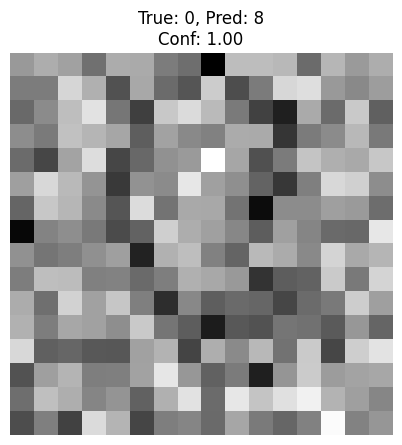

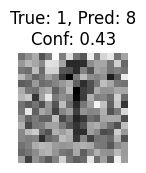

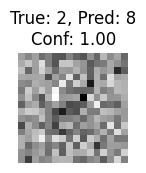

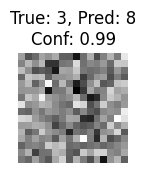

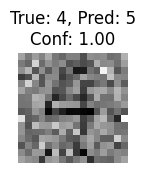

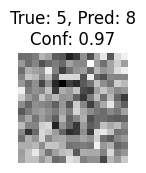

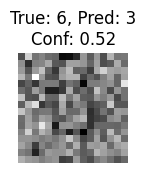

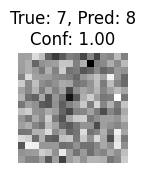

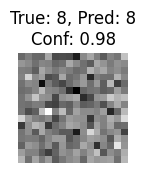

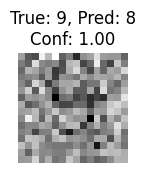


Detailed Results:
True Label | Predicted Label | Confidence
---------------------------------------------
    0      |        8        |    1.00   
    1      |        8        |    0.43   
    2      |        8        |    1.00   
    3      |        8        |    0.99   
    4      |        5        |    1.00   
    5      |        8        |    0.97   
    6      |        3        |    0.52   
    7      |        8        |    1.00   
    8      |        8        |    0.98   
    9      |        8        |    1.00   

Overall Accuracy: 0.10
Average Confidence: 0.89


In [16]:
results = {}

with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    for filename in zip_ref.namelist():
        if filename.endswith('_composite_participant65.png'):
            true_label = int(filename.split('_')[0])
            with zip_ref.open(filename) as file:
                img = Image.open(file)
                img_array = np.array(img)
                
                print(f"\nProcessing image: {filename}")
                try:
                    processed_img = preprocess_image(img_array)
                    print(f"Processed image shape: {processed_img.shape}")

                    
                    # Get model prediction
                    with torch.no_grad():
                        prediction = model(processed_img)
                    probabilities = torch.nn.functional.softmax(prediction, dim=1)
                    predicted_label = torch.argmax(probabilities).item()
                    confidence = probabilities[0, predicted_label].item()
                    
                    results[true_label] = {
                        'predicted_label': predicted_label,
                        'confidence': confidence,
                        'image': img_array
                    }
                    print(f"Successfully processed {filename}")
                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")
                    continue

# Check if any results were processed
if not results:
    print("No images were successfully processed. Please check your data and model compatibility.")
else:
    # Display results
    plt.figure(figsize=(20, 10))
    for i, (true_label, data) in enumerate(sorted(results.items())):
        plt.subplot(2, 5, i+1)
        plt.imshow(data['image'], cmap='gray')
        plt.title(f"True: {true_label}, Pred: {data['predicted_label']}\nConf: {data['confidence']:.2f}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # Print detailed results
    print("\nDetailed Results:")
    print("True Label | Predicted Label | Confidence")
    print("-" * 45)
    for true_label, data in sorted(results.items()):
        print(f"{true_label:^10} | {data['predicted_label']:^15} | {data['confidence']:^10.2f}")

    # Calculate accuracy
    accuracy = sum(1 for true_label, data in results.items() if true_label == data['predicted_label']) / len(results)
    print(f"\nOverall Accuracy: {accuracy:.2f}")

    # Calculate average confidence
    avg_confidence = sum(data['confidence'] for data in results.values()) / len(results)
    print(f"Average Confidence: {avg_confidence:.2f}")